# Module 3: Machine Learning

## Sprint 2: Gradient Boosted Trees & Feature Engineering

## Part 5: Stroke Prediction Dataset


## About this Part

Congrats!
You have reached the last Part of this Sprint.
In this Part, you will put what you learned during this and the previous Sprints into practice.
As the final assignment of this Sprint, you will train and deploy a machine learning model on the Stroke Prediction Dataset.
You will have to apply all that you have learned about training and deploying machine learning models to complete this task.
Our expectation is that you'll use your own judgment on how to perform the analysis and how to select the most important avenues of modeling, statistical testing, and exploration.
You'll have to iteratively try to find patterns in the data, raise hypotheses and use your data analysis skills to get answers.

P.S. we don't expect this project to be perfect - you will continue to improve your skills, and there will be many projects for you to apply your newly gained skills in the future.
For now, just use what you have learned and try your best!

## Context

Imagine that you are a data analyst working for The Johns Hopkins Hospital.
Your team is asked to create a machine learning model, which could predict if the patient is likely to get a stroke - being able to determine which patients have high stroke risk will allow your doctors to advise them and their families on how to act in case of an emergency.

## Objectives for this Part

- Practice working with CSV files.
- Practice performing EDA.
- Practice applying statistical inference procedures.
- Practice using various types of machine learning models.
- Practice building ensembles of machine learning models.
- Practice deploying machine learning models.
- Practice visualizing data with Matplotlib & Seaborn.
- Practice reading data, performing queries, and filtering data.

## Requirements

- Download the data from [Stroke Prediction Dataset](https://www.kaggle.com/fedesoriano/stroke-prediction-dataset).
- Perform exploratory data analysis. This should include creating statistical summaries and charts, testing for anomalies, and checking for correlations and other relations between variables and other EDA elements.
- Perform statistical inference. This should include defining the target population, forming multiple statistical hypotheses and constructing confidence intervals, setting the significance levels, and conducting z or t-tests for these hypotheses.
- Apply various machine learning models to predict the "stroke" column using all other features. This should include hyperparameter tuning, model ensembling, the analysis of model selection, and other methods. Suggestion: you might want to investigate how to use (scikit-learn pipelines)[https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html] to make your training pipelines more robust.
- Deploy the machine learning model. Choose the best performing model and deploy it. You are free to choose any deployment option that you like - you can deploy your model in a container (on your computer or on a server), do a serverless deployment on the cloud, or even deploy and serve it on the browser as a web app.
- Provide clear explanations in your notebook. Your explanations should inform the reader what you are trying to achieve, what results did you get, and what these results mean.
- Provide suggestions about how your analysis can be improved.

## Evaluation Criteria

- Adherence to the requirements. How well did you meet the requirements?
- Depth of your analysis. Did you just skim the surface, or did you explore the dataset in-depth?
- Model's performance. How well did your model perform the predictions?
- Visualization quality. Did you use charts effectively to visualize patterns in the data? Are your visualizations properly labeled? Did you use colors effectively? Did you adhere to the principle of proportional ink?
- Code quality. Was your code well-structured? Did you use the appropriate levels of abstraction? Did you remove commented-out and unused code? Did you adhere to the PEP8?
- Code performance. Did you use suitable algorithms and data structures to solve the problems?

## Correction

During your project correction, you should present your project as if talking to a product manager and senior data analyst working in your team.
You will have to find the right balance between explaining the business side and the technical aspects of your work.
You can assume that both of your colleagues have a strong understanding of and are very interested in the business aspect of your project, so be sure to clearly explain what new insights you've found while analyzing the dataset and which directions look the most promising for further research. 
However, you should also spend time explaining the technical aspects of your work, especially the more complex or unconventional choices.

During a correction, you may get asked questions that test your understanding of covered topics.

- What is wrong with preprocessing data before we run a hyperparameter search algorithm (e.g., randomized search) with cross-validation?
- What are the typical model deployment patterns? What are their advantages and disadvantages?
- How do hidden feedback loops affect machine learning models? Can you give an example of a hidden feedback loop?


## General Correction Guidelines

For an in-depth explanation about how corrections work at Turing College, please read [this doc](https://turingcollege.atlassian.net/wiki/spaces/DLG/pages/537395951/Peer+expert+reviews+corrections).


# Introduction

Stroke is a leading cause of death and disability worldwide. In a hospital setting, early identification of high-risk individuals and timely intervention can significantly reduce the impact of stroke on a patient's health and overall healthcare system burden. The goal of this project is to develop a machine learning model to predict the likelihood of a stroke in hospital patients based on various health factors, ultimately enabling healthcare professionals to provide targeted care and resources.

In this project, we will:

- Explore the dataset to understand stroke risk factors in a hospital setting.
- Clean, impute, and encode data for model training.
- Evaluate and select the best model for stroke prediction.
- Optimize the chosen model using hyperparameter tuning.
- Analyze important features and their implications for stroke risk assessment.
- Validate the final model on a test dataset to ensure generalizability and reliability.
- Deploy the model on Google Cloud Platform (GCP) for scalable, efficient, and real-time predictions.


# Data & Library import

In [ ]:
pip install featuretools

In [ ]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.4/572.4 KB 10.4 MB/s eta 0:00:00


In [ ]:
pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.2/81.2 KB 3.1 MB/s eta 0:00:00


In [ ]:
pip install optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 7.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 16.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 8.5 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time
import optuna
import joblib
import featuretools as ft
optuna.logging.set_verbosity(optuna.logging.WARNING)
from sklearn.base import BaseEstimator, TransformerMixin
from category_encoders import WOEEncoder
from sklearn.preprocessing import (
    StandardScaler,
    OneHotEncoder
)
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import (
    RandomForestClassifier, 
    AdaBoostClassifier, 
    GradientBoostingClassifier,
)
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import (
    train_test_split,
    KFold,
    cross_val_score,
    cross_validate,
)
from sklearn.metrics import (
    roc_auc_score,
    precision_recall_curve,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    classification_report,
)
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
from lightgbm import LGBMClassifier
import shap
shap.initjs()

In [ ]:
#@title Functions
from typing import List

def visualize_categorical(df: pd.DataFrame, category: str) -> None:
    fig, ax = plt.subplots(1, 2, figsize=(18, 8))

    df[[category, "stroke"]].groupby([category]).mean().plot.bar(ax=ax[0])
    ax[0].set_title(f"Proportion of {category} that had a stroke")
    ax[0].tick_params(axis="x", labelrotation=0)
    ax[0].legend_.remove()

    sns.countplot(category, hue="stroke", data=df, ax=ax[1])
    ax[1].set_title(f"Stroke: {category}")
    ax[1].legend(loc="upper right")
    plt.show()

def plot_histogram(df: pd.DataFrame, column_name: str, title: str) -> None:
    plt.figure(figsize=(14, 8))
    sns.histplot(data=df, x=column_name, color='blue', alpha=0.7)
    plt.xlabel(column_name.capitalize())
    plt.ylabel('Frequency')
    plt.title(title, fontsize=20)
    sns.despine()
    plt.show()

def plot_precision_recall_curve(y_test, y_pred_prob):
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.figure(figsize=(12, 10))
    plt.plot(thresholds, precision[:-1], label="precision")
    plt.plot(thresholds, recall[:-1], label="recall")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.title("Precision-recall curve based on threshold")
    plt.legend(loc="upper right")
    plt.show()

def plot_confusion_matrix_and_report(y_test, log_y_pred, title):
    plt.figure(figsize=(12, 10))
    conf_matrix = confusion_matrix(y_test, log_y_pred)
    sns.heatmap(
        conf_matrix,
        annot=True,
        fmt=".0f",
        cmap="Blues"
    )
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.suptitle(title + " confusion matrix", fontsize=14)
    plt.show()

    print(classification_report(y_test, log_y_pred))

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv(
    "/content/drive/MyDrive/projects/3.2.Stroke_prediction/healthcare-dataset-stroke-data.csv"
)
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


# EDA

**Are there missing values in the data set?**

In [ ]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

We see that BMI column has missing values - will think of an imputing strategy later on.

**Are there duplicates based on ID column?**

In [ ]:
duplicates = df.duplicated(subset=['id'])
print('Number of duplicates:', duplicates.sum())

Number of duplicates: 0


In [ ]:
df.drop('id', axis=1, inplace=True)

**How many had a stroke?**

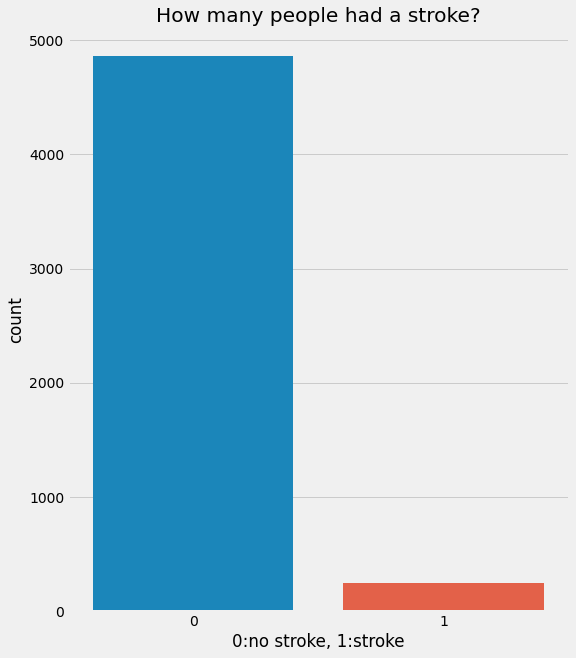

In [ ]:
fig,ax=plt.subplots(figsize=(8,10))
sns.countplot("stroke",data=df)
ax.set_title("How many people had a stroke?")
ax.set_xlabel("0:no stroke, 1:stroke");

In [ ]:
had_stroke = len(df[df["stroke"] == 1])
print(
    f"In our sample {had_stroke} ({had_stroke/len(df)*100:.2f}%) persons had a stroke."
)


In our sample 249 (4.87%) persons had a stroke.


We see that there is imbalance in the target variable - less than 5% had a stroke. Will have to use SMOTE to balance the data.

## **What is the age distribution?**

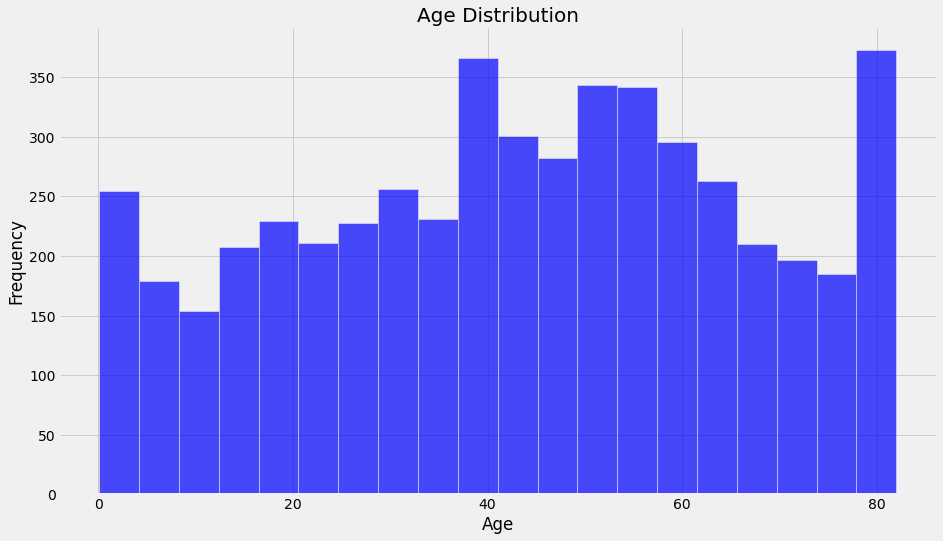

In [ ]:
plot_histogram(df, 'age', 'Age Distribution')

In [ ]:
df.age.describe()

count    5110.000000
mean       43.226614
std        22.612647
min         0.080000
25%        25.000000
50%        45.000000
75%        61.000000
max        82.000000
Name: age, dtype: float64

The age values are relatively evenly distributed. The youngest patient is only 0.08 years old (1 months) and the oldest patient is 82 years old. The median age is 45 years old, which means that half of the patients are younger than 45. 50% are aged from 25 to 61 years.

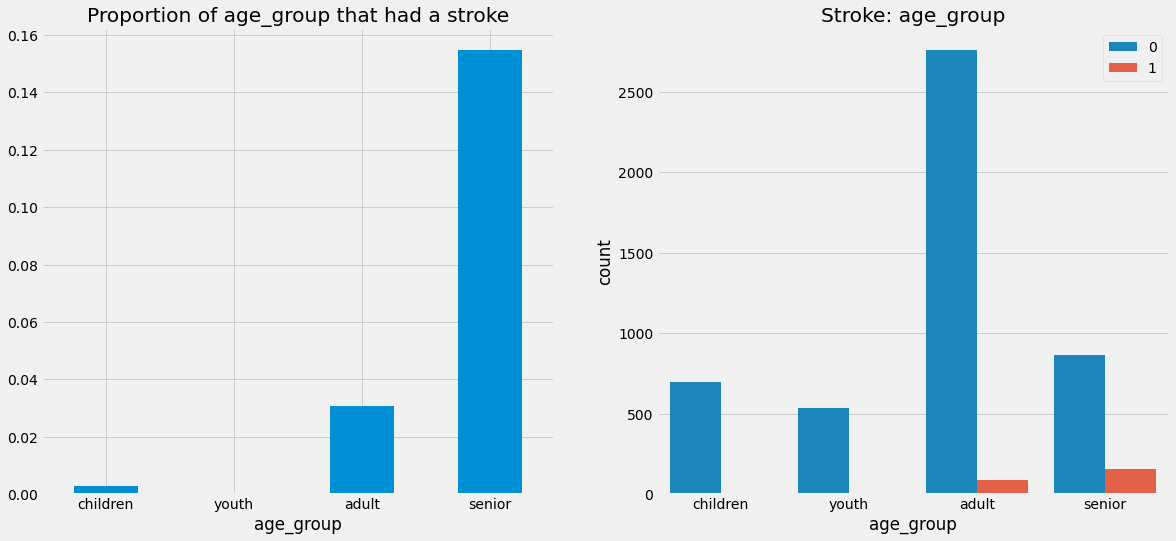

In [ ]:
# creating age bins according to Life Cycle Grouping
bins = [0, 14, 24, 64,120] 
labels = ['children', 'youth', 'adult', 'senior'] 
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
visualize_categorical(df, 'age_group')

In [ ]:
young_stroke = df[(df['age'] < 15) & (df['stroke'] == 1)]
young_stroke

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group
162,Female,1.32,0,0,No,children,Urban,70.37,NaN,Unknown,1,children
245,Female,14.00,0,0,No,children,Rural,57.93,30.9,Unknown,1,children


The proportion of stroke cases is highest in the senior age group, with about 15% of patients having a stroke. This is significantly higher than the proportion of stroke cases in the adult age group, which is only around 3%. The children and youth age groups have a very low proportion of stroke cases, with only less than 1% and 0%, respectively. 

Overall, these results suggest that age is a significant risk factor for stroke, with older patients being at a much higher risk compared to younger patients.

According to [Childrens's hospital of Pittsburg](https://www.chp.edu/our-services/brain/neurology/stroke-program/causes-and-symptoms#:~:text=Fundamental%20causes%3A,syndrome%2C%20and%20other%20cerebrovascular%20anomalies.) the main causes of stroke in children are:


*   **Genetic causes:** sickle cell, clotting disorders, and other disorders; 
*   **Environmental causes:** carbon monoxide poisoning, infection, medication, trauma, vasculitis, and dissection;
*   **Congenital causes:** arteriovenous malformation, aneurysm, Moyamoya syndrome, and other cerebrovascular anomalies.

The causes of stroke in children are different from those in adults. BMI, glucose level, hypertension or heart_disease are not the factors that cause stroke for children. The same article says that the causes of many cases of stroke in children are hard to pinpoint. Therefore, the rows where children had a stroke may need to be excluded from the model, as these cases may not be representative of the factors that contribute to stroke in the general population. It is important to have accurate and relevant data for the machine learning model to predict the risk of stroke effectively.






In [ ]:
df = df.drop(young_stroke.index)

## **What is the glucose level distribution?**

According to Cleveland Clinic [article](https://my.clevelandclinic.org/health/diagnostics/12363-blood-glucose-test) blood glucose level in healthy people can be categorized as follows:


*   up to 99 mg/dl - healthy
*   100 to 125 mg/dl - prediabetes

Higher glucose levels mean that it is likely that a person has a diabetes.




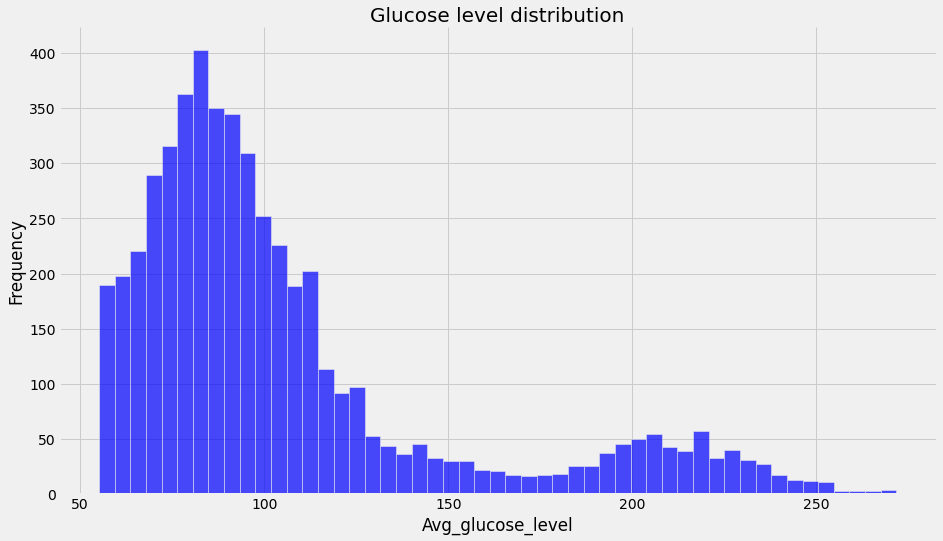

In [ ]:
plot_histogram(df, 'avg_glucose_level', 'Glucose level distribution')

Glucose levelsare heavily right skewed with a peak around 90. There is a secondary peak at around 200 - 220, which likely are patients with a severe diabetes.


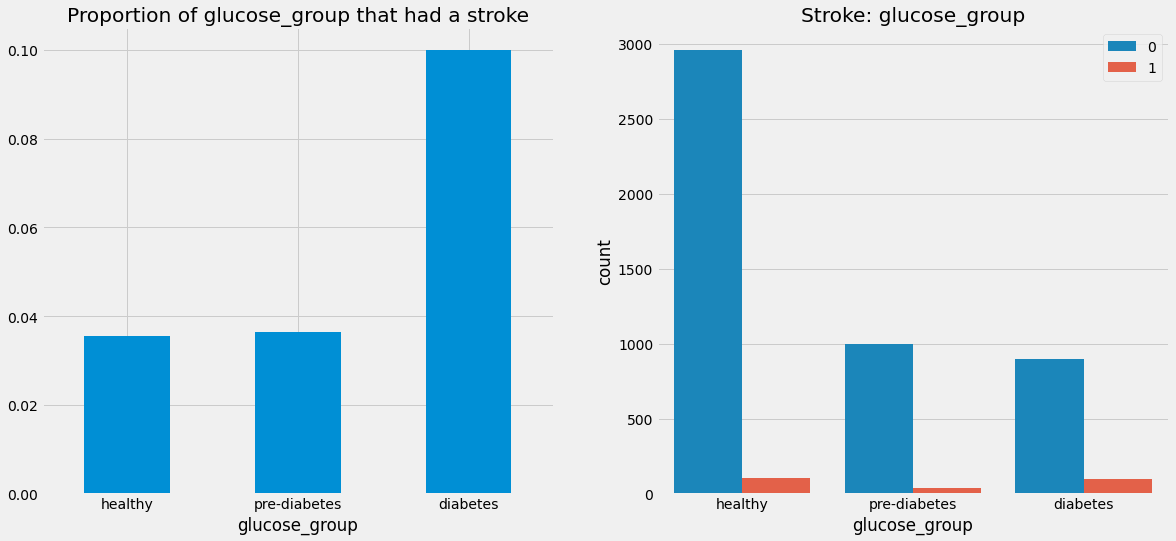

In [ ]:
bins = [0, 99, 125, 999]
labels = ["healthy", "pre-diabetes", "diabetes"]
df["glucose_group"] = pd.cut(df["avg_glucose_level"], bins=bins, labels=labels)
visualize_categorical(df, "glucose_group")

The diabetes group has the highest proportion of stroke cases (10%), followed by the pre-diabetes  and healthy group, which have similar proportions of stroke cases. These results suggest that high glucose levels are a significant risk factor for stroke.


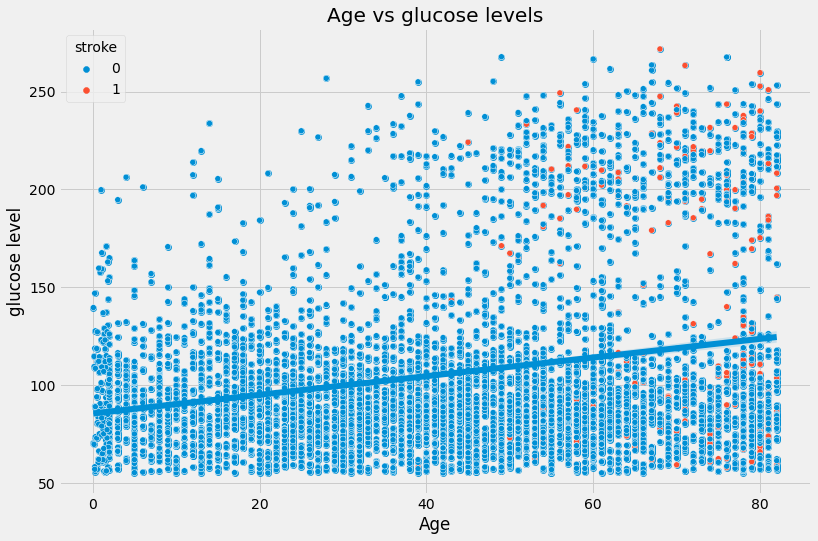

In [ ]:
plt.figure(figsize=(12, 8))

sns.regplot(x="age", y="avg_glucose_level", data=df)

sns.scatterplot(x='age', y='avg_glucose_level', hue='stroke', data=df)

plt.title('Age vs glucose levels')
plt.xlabel('Age')
plt.ylabel('glucose level')

plt.show()

We also see that there is a positive linear relationship between age and glucose levels. It seems like for older people it is harder to take good care of their health.

## **What is the BMI distribution?**

In [ ]:
df_stroke_nan_bmi = df[(df["bmi"].isnull()) & (df["stroke"] == 1)]
len_stroke_nan_bmi = len(df_stroke_nan_bmi)
all_stroke = len(df[df["stroke"] == 1])
print(
    f"In our sample {len_stroke_nan_bmi} ({len_stroke_nan_bmi/all_stroke*100:.2f}%) stroke patient BMI data is missing."
)


In our sample 39 (15.79%) stroke patient BMI data is missing.


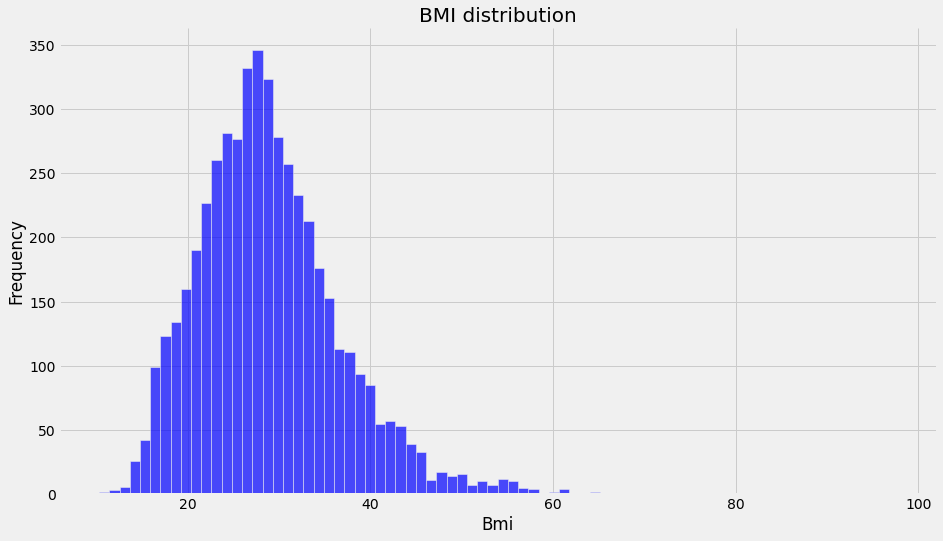

In [ ]:
plot_histogram(df, 'bmi', 'BMI distribution')

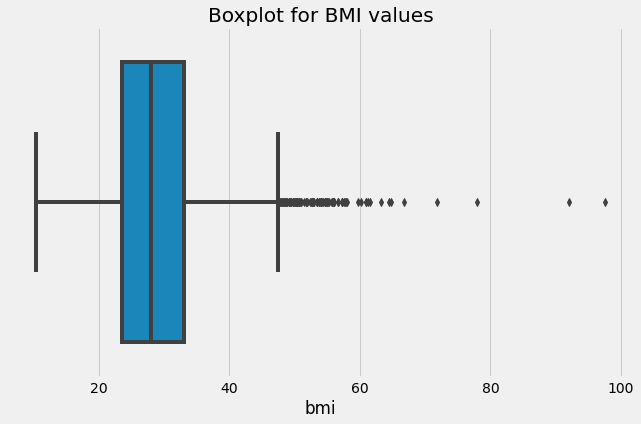

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='bmi')
plt.title('Boxplot for BMI values');

In [ ]:
df[df['bmi'] > 70]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group
544,Male,42.0,0,0,Yes,Private,Rural,210.48,71.9,never smoked,0,adult,diabetes
928,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0,youth,healthy
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0,youth,healthy
4209,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0,adult,healthy


BMI has close to a normal distribution, but has many 45 to 100 outlier values.

I had to do some reasearch on BMI and according to [Centers for Disease Control and Prevention (CDC)](https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%2018.5,falls%20within%20the%20obese%20range.)

*  BMI is less than 18.5, it falls within the underweight range.
*  BMI is 18.5 to 24.9, it falls within the Healthy Weight range.
*  BMI is 25.0 to 29.9, it falls within the overweight range.
*  BMI is 30.0 or higher, it falls within the obese range.

BMI over 80 is called super-super-super obese.

The more excess weight a person has, the more resistant person's muscle and tissue cells become insulin hormone. According to American Diabetes Association being overweight raises  risk for type 2 diabetes, heart disease, and stroke.
Based on the information, I find it very unlikely that extremely obese patients would have normal glucose levels and don't have heart diseases. I will drop the rows where a patient has extremely high BMI and other health features are normal.




In [ ]:
df_bmi_drop = df[df['bmi'] > 75]
df_bmi_drop

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group
928,Female,23.0,1,0,No,Private,Urban,70.03,78.0,smokes,0,youth,healthy
2128,Male,17.0,1,0,No,Private,Rural,61.67,97.6,Unknown,0,youth,healthy
4209,Male,38.0,1,0,Yes,Private,Rural,56.90,92.0,never smoked,0,adult,healthy


In [ ]:
df = df.drop(df_bmi_drop.index)

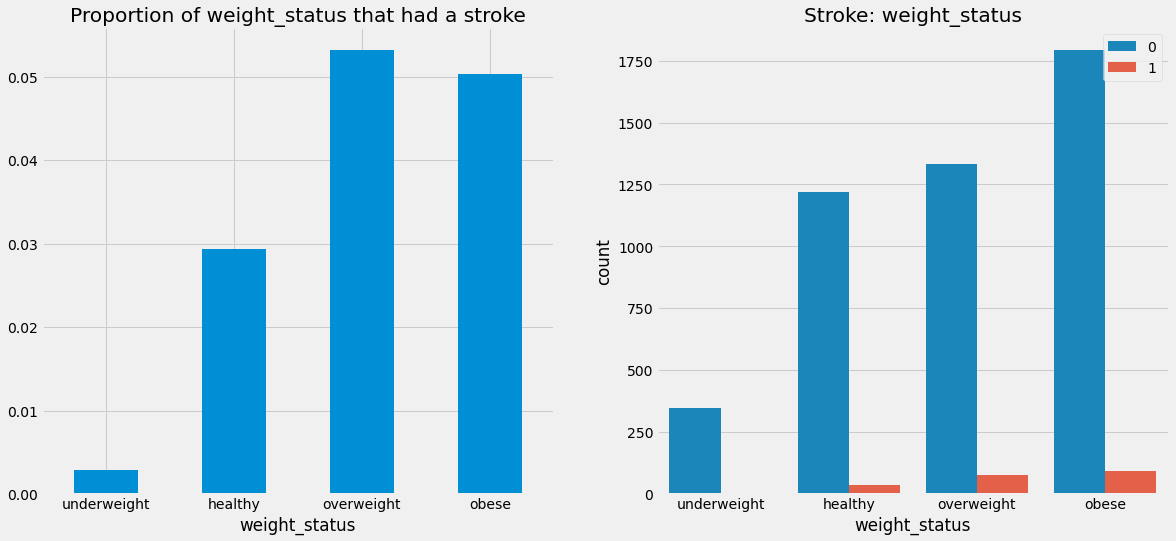

In [ ]:
bins = [0, 18.5, 25, 30, 111]
labels = ["underweight", "healthy", "overweight", "obese"]
dfx=df.copy()
dfx["weight_status"] = pd.cut(dfx["bmi"], bins=bins, labels=labels)
visualize_categorical(dfx, "weight_status")

The results show the stroke proportions for different weight status among the patient population studied. The highest stroke proportion is seen among overweight individuals more than 5%, followed by those who are obese - 5%. Patients who are underweight have the lowest stroke proportion, while those with a healthy weight have a stroke proportion of around 3%. These results suggest that being overweight or obese may be significant risk factors for stroke.

## **Categorical variable analysis**

**What is gender to stroke relationship?**

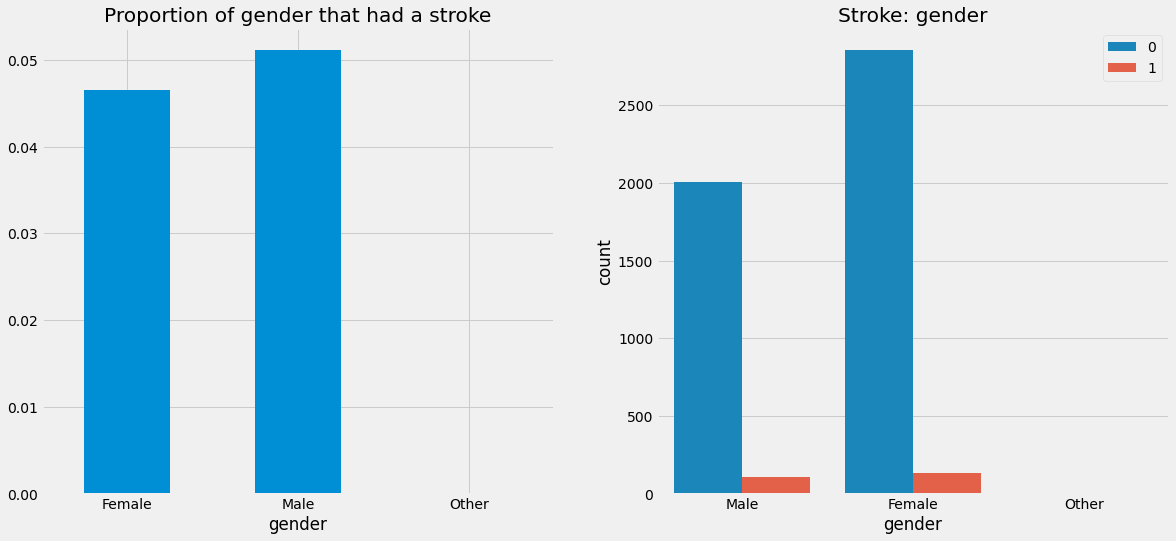

In [ ]:
visualize_categorical(df, 'gender')

In [ ]:
df[df["gender"]=="Other"]

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke,age_group,glucose_group
3116,Other,26.0,0,0,No,Private,Rural,143.33,22.4,formerly smoked,0,adult,diabetes


In [ ]:
df = df[df["gender"] != "Other"]

The sample size for other gender category is too small to make any reasonable conclusions, so to not mess with the model we have dropped the row. 

The proportion of stroke cases for males is slightly higher than for females. However, the difference is relatively small and may not be significant. Overall, these results suggest that both genders are at risk for stroke and that the proportion of stroke cases is similar between males and females in this dataset.

**What are hypertension and heart_disease  conditions like in stroke patients?**

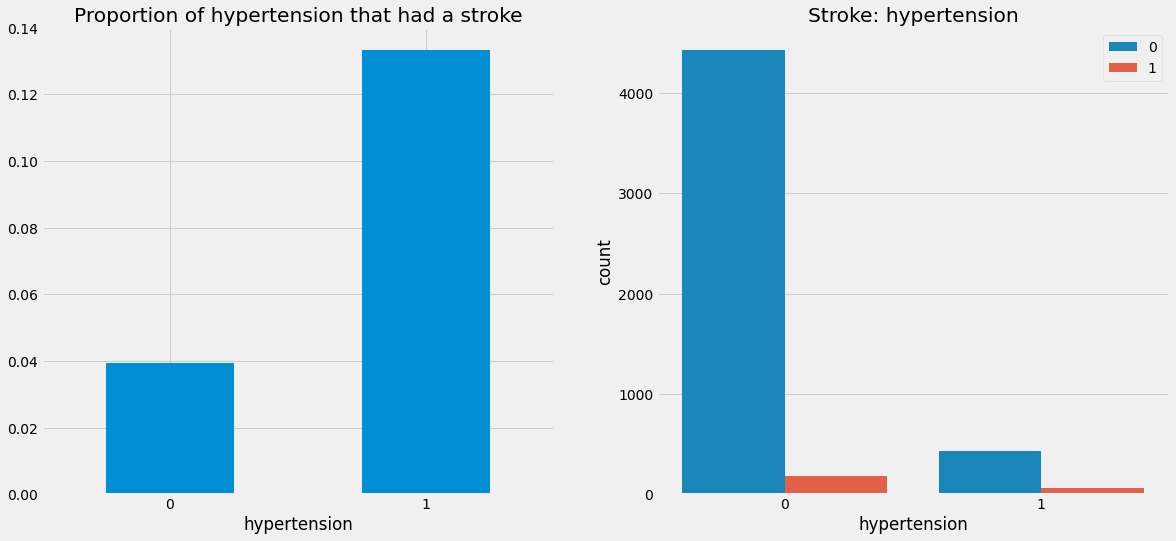

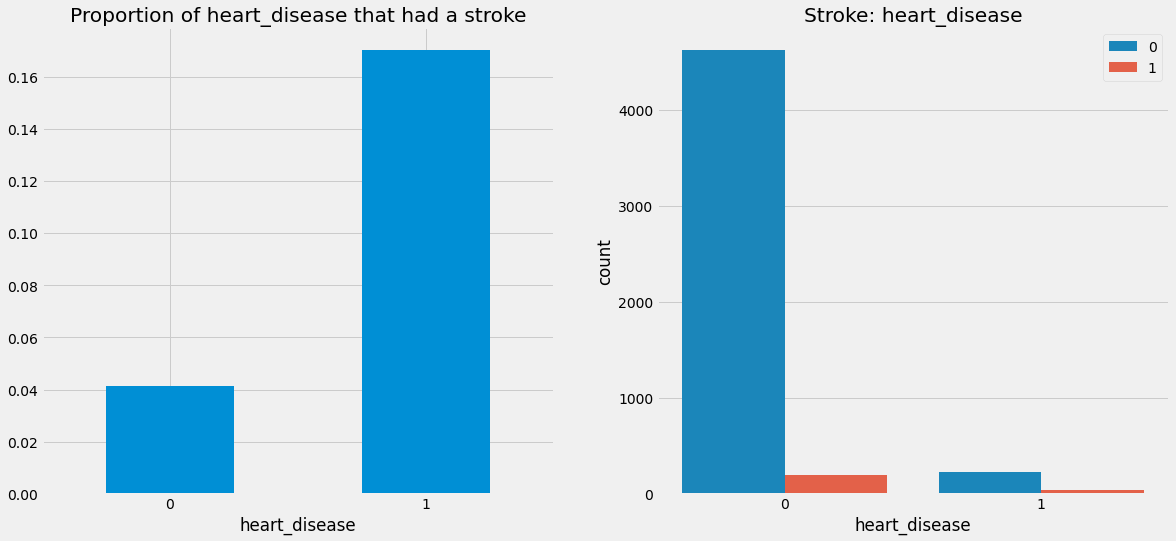

In [ ]:
for c in ["hypertension", "heart_disease"]:
  visualize_categorical(df, c)

These results show how hypertension and heart disease are associated with an increased risk of stroke.

In the case of hypertension, the data is divided into two groups - patients with hypertension and patients without hypertension. The group with hypertension has a significantly higher proportion of stroke cases - around 13 compared to the group without hypertension approx. 4% . 

Similarly, for heart disease, the data is divided into two groups - patients with heart disease and patients without heart disease. The group with heart disease has a much higher proportion of stroke cases - 17% compared to the group without heart disease 4%. This indicates that heart disease is also a significant risk factor for stroke, and patients with heart disease should be more careful about managing their risk factors to prevent a stroke.

**What is the relationship between heart disease, hypertension, and stroke risk ?**


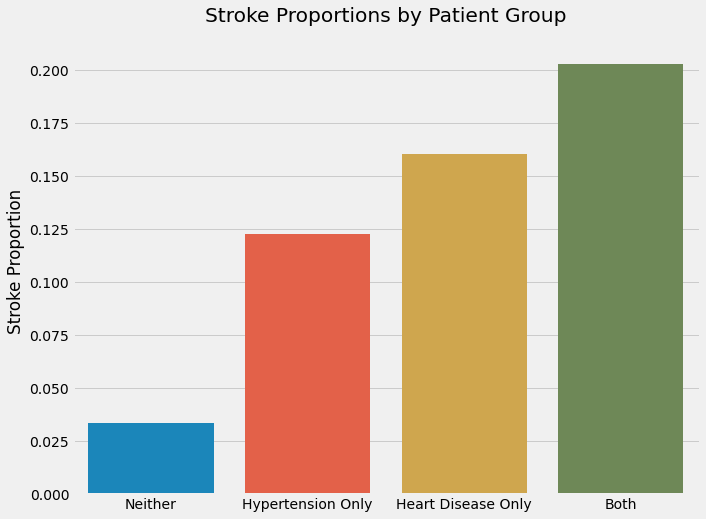

In [ ]:
groups = (
    df.groupby(["heart_disease", "hypertension"])["stroke"].mean().reset_index()
)
labels = ["Neither", "Hypertension Only", "Heart Disease Only", "Both"]
values = groups["stroke"].tolist()

plt.figure(figsize=(10, 8))
sns.barplot(x=labels, y=values)
plt.ylabel("Stroke Proportion")
plt.title("Stroke Proportions by Patient Group")
plt.ylim(0, 0.22)
sns.despine()
plt.show()


The stroke proportion for patients with both heart disease and hypertension is the highest at around 20%, indicating that this group has the highest risk of suffering a stroke.

While patients with neither condition have the lowest stroke proportion at around 3%, which indicates that these patients have a relatively lower risk of suffering a stroke. Overall, these results suggest that both heart disease and hypertension are significant risk factors for stroke

**What is the relationship between marriage, work type and residence in stroke patients?**

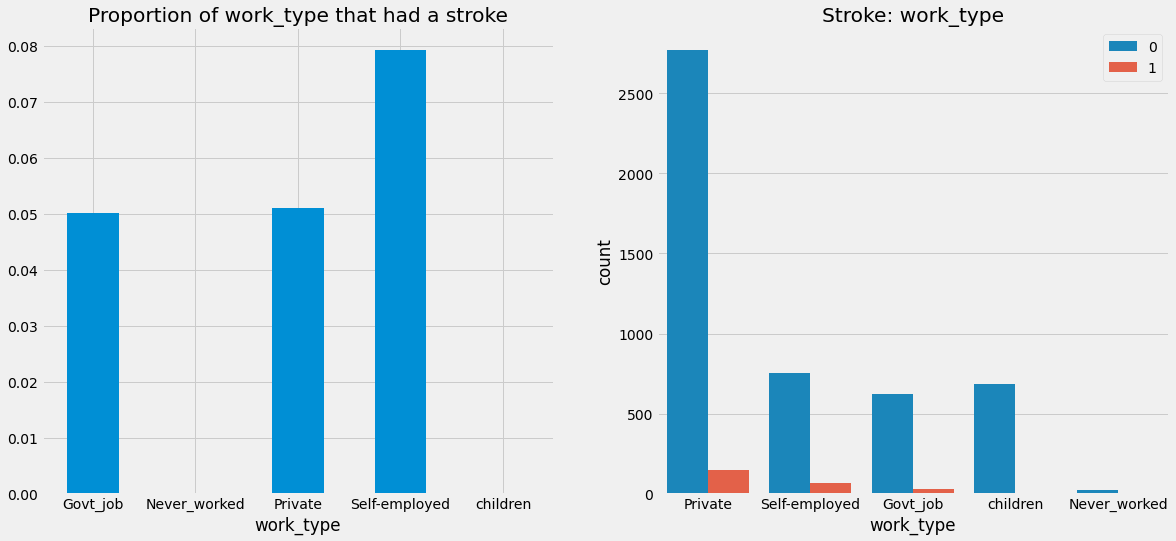

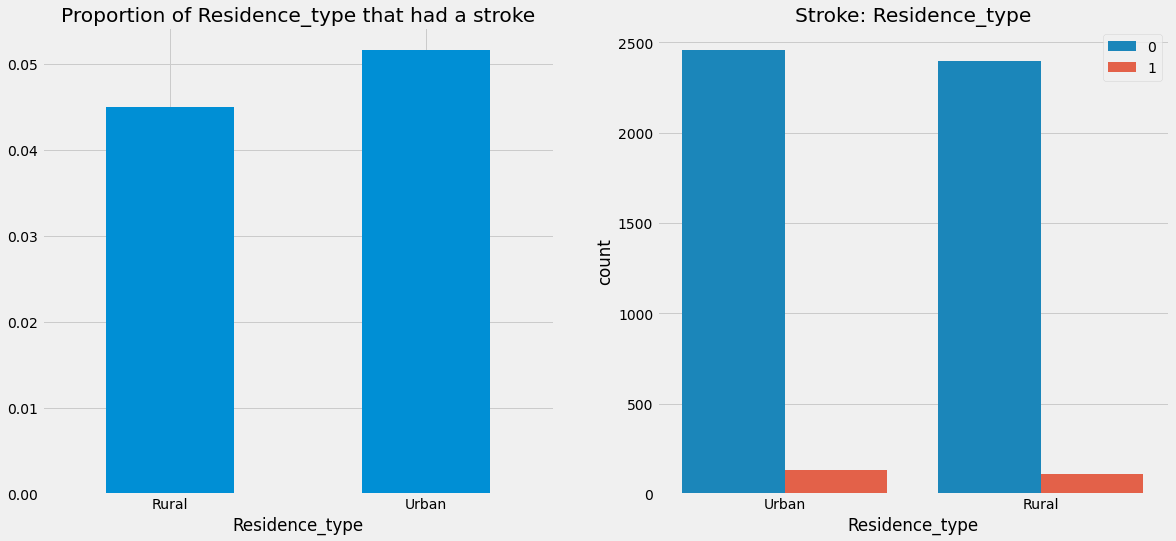

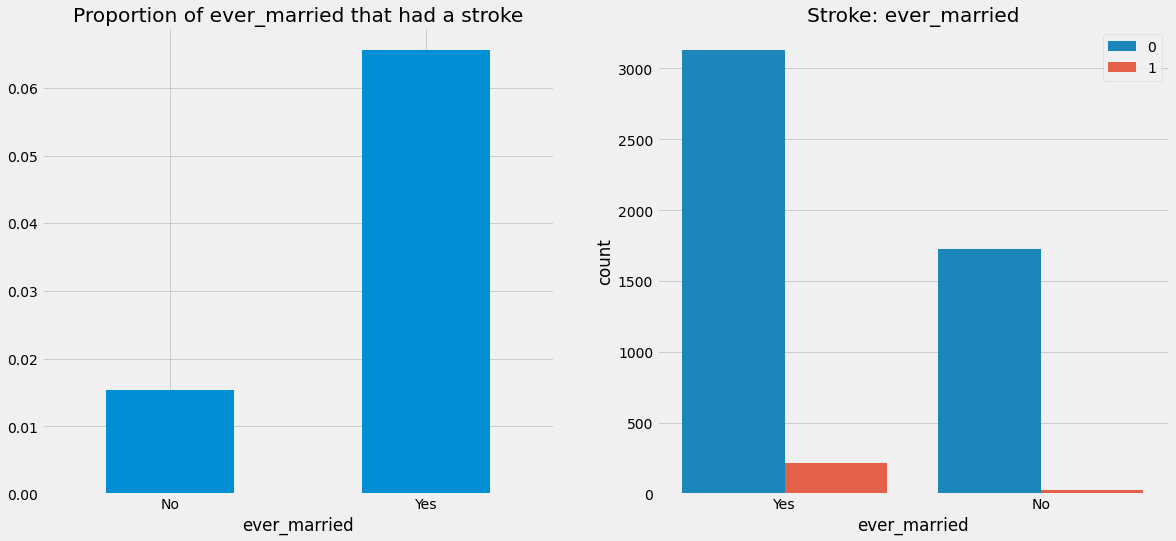

In [ ]:
for c in ["work_type", "Residence_type", "ever_married"]:
  visualize_categorical(df, c)

The results show that self-employed individuals have the highest stroke proportion  around 8% among the different work types , suggesting they may be at a higher risk of stroke. The stroke proportion for patients living in urban areas is slightly higher than in rural areas , but further analysis is needed to determine if the difference is significant. The stroke proportion is much higher for married patients compared to unmarried patients, but this may be influenced by other factors such as age and lifestyle.

**What is the relationship between smoking and stroke?**

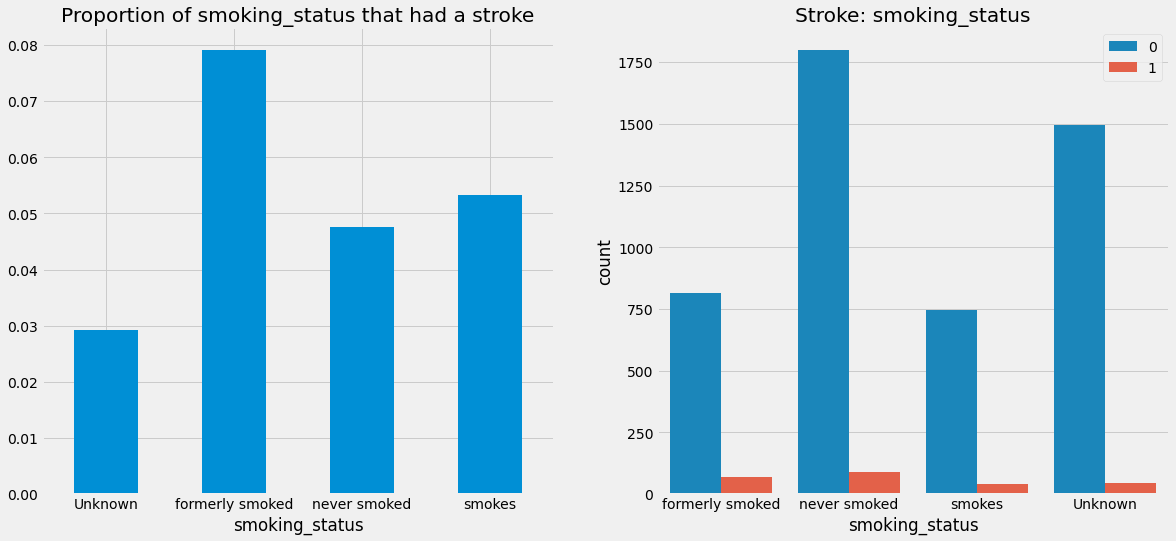

In [ ]:
visualize_categorical(df, "smoking_status")

The results show the stroke proportions for patients with different smoking statuses. Former smokers have the highest stroke proportion (around 8%), followed by current smokers, never smokers, and patients with unknown smoking status. These results suggest that smoking is a significant risk factor for stroke. 

**Correlation analysis**

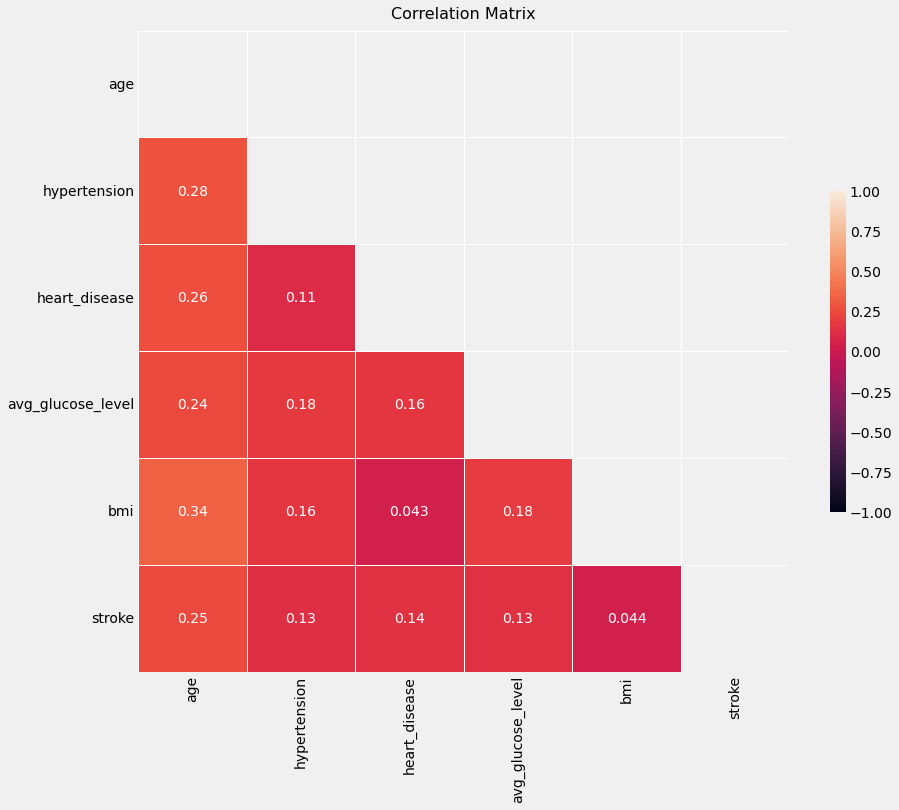

In [ ]:
plt.figure(figsize=(13, 11))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
heatmap = sns.heatmap(
    corr,
    mask=mask,
    vmin=-1,
    vmax=1,
    annot=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)
heatmap.set_title(
    "Correlation Matrix",
    fontdict={"fontsize": 16},
    pad=12,
);

Based on the correlation results, we can see that there is a positive correlation between stroke and age (0.25), heart disease (0.14), average glucose level (0.13) and hypertension (0.13). There is also a positive correlation between hypertension and heart disease (0.11) and between average glucose level and BMI (0.17). 

# Machine Learning

## Initial models

In [ ]:
random_state = 11

In [ ]:
X = df.drop("stroke", axis=1)
y = df.stroke
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=random_state
)

In [ ]:
num_col = [
    "age",
    "hypertension",
    "heart_disease",
    "bmi",
    "avg_glucose_level"
]

cat_col = [
    "gender",
    "ever_married",
    "work_type",
    "Residence_type",
    "smoking_status",
    "age_group",
    "glucose_group"
]

num_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='median')),
    ('scale', StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ('impute', SimpleImputer(strategy='most_frequent')),
    ('woe', WOEEncoder())
])

preprocessor = ColumnTransformer(
    transformers=[
        ("cat_pipeline", cat_pipeline, cat_col),
        ("num_pipeline", num_pipeline, num_col)], 
        remainder="passthrough"
)


models = [
    ('Logistic Regression', LogisticRegression()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('LGBMclassifier', LGBMClassifier()),
    ('AdaBoostClassifier', AdaBoostClassifier()),
    ('XGBClassifier', XGBClassifier()),
    ('GradientBoostingClassifier', GradientBoostingClassifier())
]

In [ ]:
f1 = []
roc_auc = []
precision = []
recall = []
std = []
training_time = []

kfold = KFold(n_splits=4, shuffle=True, random_state=random_state)
scoring = ["f1", "roc_auc", "precision", "recall"]

for name, model in models:
    pipe = ImbPipeline(steps=[("preprocessor", preprocessor), ("classifier", model)])
    start_time = time.time() 
    cv_results = cross_validate(
        pipe, X_train, y_train, cv=kfold, scoring=scoring, return_train_score=True
    )
    end_time = time.time() 
    training_time.append(end_time - start_time) 
    f1.append(cv_results["test_f1"].mean())
    roc_auc.append(cv_results["test_roc_auc"].mean())
    precision.append(cv_results["test_precision"].mean())
    recall.append(cv_results["test_recall"].mean())
    std.append(cv_results["test_roc_auc"].std())

model_df = pd.DataFrame(
    {
        "F1_score": f1,
        "ROC-AUC": roc_auc,
        "Precision": precision,
        "Recall": recall,
        "Std": std,
        "Training_time": training_time, 
    },
    index=["default_"+name for name, _ in models],
)

model_df.sort_values("ROC-AUC", ascending=False)


,F1_score,ROC-AUC,Precision,Recall,Std,Training_time
default_Logistic Regression,0.000000,0.843675,0.000000,0.000000,0.014476,5.103847
default_GradientBoostingClassifier,0.020000,0.827341,0.175000,0.010764,0.016227,2.738499
default_AdaBoostClassifier,0.011364,0.816529,0.125000,0.005952,0.023764,2.011131
default_LGBMclassifier,0.053183,0.797477,0.171828,0.031840,0.026675,2.287439
default_Random Forest,0.008065,0.790344,0.062500,0.004310,0.023983,4.941185
default_XGBClassifier,0.045959,0.761250,0.090132,0.031096,0.031135,2.369707
default_K-Nearest Neighbors,0.017010,0.613382,0.081250,0.009519,0.013603,7.808336
default_Decision Tree,0.143213,0.553078,0.132947,0.155549,0.033312,1.902559


In [ ]:
f1 = []
roc_auc = []
precision = []
recall = []
std = []
training_time = []

kfold = KFold(n_splits=4, shuffle=True, random_state=random_state)
scoring = ["f1", "roc_auc", "precision", "recall"]

for name, model in models:
    pipe = ImbPipeline(steps=[
        ("preprocessor", preprocessor), 
        ("smote", SMOTE(random_state=random_state)),
        ("classifier", model)
    ])
    start_time = time.time() 
    cv_results = cross_validate(
        pipe, X_train, y_train, cv=kfold, scoring=scoring, return_train_score=True
    )
    end_time = time.time() 
    training_time.append(end_time - start_time) 
    f1.append(cv_results["test_f1"].mean())
    roc_auc.append(cv_results["test_roc_auc"].mean())
    precision.append(cv_results["test_precision"].mean())
    recall.append(cv_results["test_recall"].mean())
    std.append(cv_results["test_roc_auc"].std())

model_df = pd.DataFrame(
    {
        "F1_score": f1,
        "ROC-AUC": roc_auc,
        "Precision": precision,
        "Recall": recall,
        "Std": std,
        "Training_time": training_time, 
    },
    index=["balanced_"+name for name, _ in models],
)

model_df.sort_values("ROC-AUC", ascending=False)

,F1_score,ROC-AUC,Precision,Recall,Std,Training_time
balanced_Logistic Regression,0.216188,0.838814,0.125250,0.798216,0.016709,2.163980
balanced_AdaBoostClassifier,0.164566,0.819471,0.168889,0.161080,0.017088,3.035652
balanced_GradientBoostingClassifier,0.081911,0.803394,0.135162,0.060064,0.019957,5.601553
balanced_LGBMclassifier,0.094674,0.787489,0.184174,0.064706,0.017988,2.121631
balanced_Random Forest,0.063757,0.782142,0.102367,0.046567,0.013635,4.818824
balanced_XGBClassifier,0.104700,0.766633,0.155912,0.079206,0.033781,6.251809
balanced_K-Nearest Neighbors,0.153775,0.672665,0.096674,0.379312,0.011560,2.308941
balanced_Decision Tree,0.111512,0.535431,0.097039,0.131303,0.020552,1.554448


Here we performed a comparative evaluation of multiple classifiers to identify the best-performing model on our train dataset. We used a 4-fold cross-validation with shuffle and a fixed random state to ensure consistent results. 

The results revealed that the Logistic Regression model achieved the highest ROC-AUC score, indicating its superior classification performance. Other models, such as AdaBoost and Gradient Boosting, also demonstrated promising results, but Logistic Regression remained the best performer.

## Model tuning

I will hypertune Logistic Regression, AdaBoost, and LightGBM models because of their relatively higher ROC-AUC scores and reasonable training times.

### Logistic regression

In [ ]:
# def logreg_objective(trial):
#     _penalty = trial.suggest_categorical("penalty", ["l2", None] )
#     _C = trial.suggest_float("C", 1e-10, 1000)

#     lr = LogisticRegression(
#         penalty=_penalty,
#         C=_C,
#         random_state=random_state,
#     )
#     kfolds = KFold(n_splits=4, shuffle=True, random_state=random_state)
#     pipe = ImbPipeline(steps=[
#         ("preprocessor", preprocessor), 
#         ("smote", SMOTE(random_state=random_state)),
#         ("classifier", lr)
#     ])
#     score = cross_val_score(
#         pipe, X_train, y_train, cv=kfolds, scoring="roc_auc"
#     ).mean()
#     return score


# study = optuna.create_study(direction="maximize")
# study.optimize(logreg_objective, n_trials=200,show_progress_bar=True)

# params = study.best_params
# best_score = study.best_value
# print(f"Best score: {best_score} \nOptimized parameters: {params}")
# joblib.dump(study, "/content/drive/MyDrive/projects/3.2.models/log_reg.pkl")

  0%|          | 0/200 [00:00<?, ?it/s]

Best score: 0.8404269529161255 
Optimized parameters: {'penalty': 'l2', 'C': 0.025582097403299642}


['/content/drive/MyDrive/projects/3.2.models/log_reg.pkl']

### Lightgbm

In [ ]:
# def lgbm_objective(trial):
#     param = {
#         "objective": "binary",
#         "metric": "binary_error",
#         "verbosity": -1,
#         "boosting_type": "gbdt",
#         "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#         "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#         "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#         "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#         "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#         "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#         "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#     }

#     lgbm = LGBMClassifier(
#         **param,
#         n_jobs=-1,
#         random_state=random_state,
#     )
#     kfolds = KFold(n_splits=4, shuffle=True, random_state=random_state)
#     pipe = ImbPipeline(steps=[
#         ("preprocessor", preprocessor), 
#         ("smote", SMOTE(random_state=random_state)),
#         ("classifier", lgbm)
#     ])

#     score = cross_val_score(
#         pipe, X_train, y_train, cv=kfolds, scoring="roc_auc"
#     ).mean()
#     return score


# study = optuna.create_study(direction="maximize")
# study.optimize(lgbm_objective, n_trials=200,show_progress_bar=True)

# params = study.best_params
# best_score = study.best_value
# print(f"Best score: {best_score} \nOptimized parameters: {params}")
# joblib.dump(study, "/content/drive/MyDrive/projects/3.2.models/lgbm.pkl")


  0%|          | 0/200 [00:00<?, ?it/s]

Best score: 0.8289893337205421 
Optimized parameters: {'lambda_l1': 8.967745046080667, 'lambda_l2': 1.6167567510256897, 'num_leaves': 39, 'feature_fraction': 0.40788380549788816, 'bagging_fraction': 0.45178548930581286, 'bagging_freq': 3, 'min_child_samples': 100}


['/content/drive/MyDrive/projects/3.2.models/lgbm.pkl']

### AdaBoost

In [ ]:
# def adaboost_objective(trial):
#     _n_estimators = trial.suggest_int("n_estimators",10, 1000)

#     ada = AdaBoostClassifier(
#         n_estimators=_n_estimators,
#         random_state=random_state,
#     )
#     kfolds = KFold(n_splits=4, shuffle=True, random_state=random_state)
#     pipe = ImbPipeline(
#         steps=[
#             ("preprocessor", preprocessor),
#             ("smote", SMOTE(random_state=random_state)),
#             ("classifier", ada),
#         ]
#     )

#     score = cross_val_score(
#         pipe, X_train, y_train, cv=kfolds, scoring="roc_auc"
#     ).mean()
#     return score


# study = optuna.create_study(direction="maximize")
# study.optimize(adaboost_objective, n_tri  als=100,show_progress_bar=True)

# params = study.best_params
# best_score = study.best_value
# print(f"Best score: {best_score} \nOptimized parameters: {params}")
# joblib.dump(study, "/content/drive/MyDrive/projects/3.2.models/adaboost.pkl")

  0%|          | 0/100 [00:00<?, ?it/s]

Best score: 0.8271011386570332 
Optimized parameters: {'n_estimators': 36}


['/content/drive/MyDrive/projects/3.2.models/adaboost.pkl']

Logistic Regression, LightGBM, and AdaBoost - exhibited varying performance in terms of ROC-AUC scores and training times. Logistic Regression, being a simpler linear model, outperformed the more complex tree-based models in this case.

### Feature engineering

Lets see if adding new features will improve the model performance. 

In [ ]:
preprocessing_pipe = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
    ]
)


In [ ]:
preprocessed_X_train = preprocessing_pipe.fit_transform(X_train, y_train)


In [ ]:
cat_col_encoded = [f"woe_{col}" for col in cat_col]
all_columns = cat_col_encoded + num_col

preprocessed_X_train_df = pd.DataFrame(
    preprocessed_X_train, columns=all_columns, index=X_train.index
)
preprocessed_X_train_df.head()


,woe_gender,woe_ever_married,woe_work_type,woe_Residence_type,woe_smoking_status,woe_age_group,woe_glucose_group,age,hypertension,heart_disease,bmi,avg_glucose_level
4193,-0.037020,-1.182904,0.036616,0.052281,-0.475430,-0.446197,0.774200,-0.723350,-0.32635,-0.237494,-0.498710,0.435556
3253,-0.037020,0.319134,0.047218,-0.056583,0.114811,-0.446197,-0.335580,-0.413894,-0.32635,-0.237494,0.422171,-0.438735
388,0.051121,0.319134,0.047218,-0.056583,0.485461,-0.446197,-0.335580,0.514476,-0.32635,-0.237494,2.066601,-0.195791
602,-0.037020,0.319134,0.047218,-0.056583,0.004819,-0.446197,-0.335580,-0.192853,-0.32635,-0.237494,-0.696042,-0.185008
1172,-0.037020,-1.182904,0.036616,-0.056583,0.114811,-0.446197,-0.216408,-0.148645,-0.32635,-0.237494,0.237994,0.245426


In [ ]:

es = ft.EntitySet(id="stroke_train_data")
es = es.add_dataframe(
    dataframe=preprocessed_X_train_df, dataframe_name="train_patients", index="index"
)

feature_matrix, feature_defs = ft.dfs(
    entityset=es,
    target_dataframe_name="train_patients",
    trans_primitives=["add_numeric", "multiply_numeric"],
    agg_primitives=[],
    max_depth=1,
)

feature_matrix.head()


,woe_gender,woe_ever_married,woe_work_type,woe_Residence_type,woe_smoking_status,woe_age_group,woe_glucose_group,age,hypertension,heart_disease,...,woe_ever_married * woe_smoking_status,woe_ever_married * woe_work_type,woe_gender * woe_Residence_type,woe_gender * woe_glucose_group,woe_gender * woe_smoking_status,woe_gender * woe_work_type,woe_glucose_group * woe_Residence_type,woe_glucose_group * woe_smoking_status,woe_glucose_group * woe_work_type,woe_smoking_status * woe_work_type
index,,,,,,,,,,,,,,,,,,,,,
0,-0.037020,-1.182904,0.036616,0.052281,-0.475430,-0.446197,0.774200,-0.723350,-0.32635,-0.237494,...,0.562388,-0.043313,-0.001935,-0.028661,0.017601,-0.001356,0.040476,-0.368078,0.028348,-0.017408
1,-0.037020,0.319134,0.047218,-0.056583,0.114811,-0.446197,-0.335580,-0.413894,-0.32635,-0.237494,...,0.036640,0.015069,0.002095,0.012423,-0.004250,-0.001748,0.018988,-0.038528,-0.015845,0.005421
2,0.051121,0.319134,0.047218,-0.056583,0.485461,-0.446197,-0.335580,0.514476,-0.32635,-0.237494,...,0.154927,0.015069,-0.002893,-0.017155,0.024817,0.002414,0.018988,-0.162911,-0.015845,0.022922
3,-0.037020,0.319134,0.047218,-0.056583,0.004819,-0.446197,-0.335580,-0.192853,-0.32635,-0.237494,...,0.001538,0.015069,0.002095,0.012423,-0.000178,-0.001748,0.018988,-0.001617,-0.015845,0.000228
4,-0.037020,-1.182904,0.036616,-0.056583,0.114811,-0.446197,-0.216408,-0.148645,-0.32635,-0.237494,...,-0.135810,-0.043313,0.002095,0.008012,-0.004250,-0.001356,0.012245,-0.024846,-0.007924,0.004204


In [ ]:
f1 = []
roc_auc = []
precision = []
recall = []
std = []
training_time = []

kfold = KFold(n_splits=4, shuffle=True, random_state=random_state)
scoring = ["f1", "roc_auc", "precision", "recall"]

for name, model in models:
    pipe = ImbPipeline(steps=[
        ("smote", SMOTE(random_state=random_state)),
        ("classifier", model)
    ])
    start_time = time.time() 
    cv_results = cross_validate(
        pipe, feature_matrix, y_train, cv=kfold, scoring=scoring, return_train_score=True
    )
    end_time = time.time() 
    training_time.append(end_time - start_time) 
    f1.append(cv_results["test_f1"].mean())
    roc_auc.append(cv_results["test_roc_auc"].mean())
    precision.append(cv_results["test_precision"].mean())
    recall.append(cv_results["test_recall"].mean())
    std.append(cv_results["test_roc_auc"].std())

model_df = pd.DataFrame(
    {
        "F1_score": f1,
        "ROC-AUC": roc_auc,
        "Precision": precision,
        "Recall": recall,
        "Std": std,
        "Training_time": training_time, 
    },
    index=["balanced_"+name for name, _ in models],
)

model_df.sort_values("ROC-AUC", ascending=False)

,F1_score,ROC-AUC,Precision,Recall,Std,Training_time
balanced_Logistic Regression,0.196052,0.796324,0.115548,0.658521,0.030095,4.060667
balanced_GradientBoostingClassifier,0.097191,0.778605,0.129695,0.078859,0.019603,80.978554
balanced_AdaBoostClassifier,0.143918,0.770214,0.132111,0.165132,0.021561,18.261868
balanced_Random Forest,0.063357,0.766911,0.114727,0.047812,0.010408,15.730592
balanced_LGBMclassifier,0.062976,0.766859,0.102546,0.046567,0.012446,21.528348
balanced_XGBClassifier,0.088124,0.754682,0.129973,0.068442,0.025680,45.698105
balanced_K-Nearest Neighbors,0.162559,0.662005,0.102978,0.387933,0.009253,3.419482
balanced_Decision Tree,0.120980,0.542469,0.103343,0.147687,0.013524,2.666949


In [ ]:
# def logreg_feat_objective(trial):
#     _penalty = trial.suggest_categorical("penalty", ["l2", None])
#     _C = trial.suggest_float("C", 1e-10, 1000)

#     lr = LogisticRegression(
#         penalty=_penalty,
#         C=_C,
#         random_state=random_state,
#     )
#     kfolds = KFold(n_splits=4, shuffle=True, random_state=random_state)
#     pipe = ImbPipeline(steps=[
#         ("smote", SMOTE(random_state=random_state)),
#         ("classifier", lr)
#     ])
#     score = cross_val_score(
#         pipe, feature_matrix, y_train, cv=kfolds, scoring="roc_auc"
#     ).mean()
#     return score



# study = optuna.create_study(direction="maximize")
# study.optimize(logreg_feat_objective, n_trials=200,show_progress_bar=True)

# params = study.best_params
# best_score = study.best_value
# print(f"Best score: {best_score} \nOptimized parameters: {params}")
# joblib.dump(study, "/content/drive/MyDrive/projects/3.2.models/log_reg_feat.pkl")

  0%|          | 0/200 [00:00<?, ?it/s]

Best score: 0.8186720649112503 
Optimized parameters: {'penalty': 'l2', 'C': 0.029110595364294722}


['/content/drive/MyDrive/projects/3.2.models/log_reg_feat.pkl']

In [ ]:
# def lgbm_feat_objective(trial):
#     param = {
#         "objective": "binary",
#         "metric": "binary_error",
#         "verbosity": -1,
#         "boosting_type": "gbdt",
#         "lambda_l1": trial.suggest_float("lambda_l1", 1e-8, 10.0, log=True),
#         "lambda_l2": trial.suggest_float("lambda_l2", 1e-8, 10.0, log=True),
#         "num_leaves": trial.suggest_int("num_leaves", 2, 256),
#         "feature_fraction": trial.suggest_float("feature_fraction", 0.4, 1.0),
#         "bagging_fraction": trial.suggest_float("bagging_fraction", 0.4, 1.0),
#         "bagging_freq": trial.suggest_int("bagging_freq", 1, 7),
#         "min_child_samples": trial.suggest_int("min_child_samples", 5, 100),
#     }

#     lgbm = LGBMClassifier(
#         **param,
#         n_jobs=-1,
#         random_state=random_state,
#     )
#     kfolds = KFold(n_splits=4, shuffle=True, random_state=random_state)
#     pipe = ImbPipeline(steps=[
#         ("smote", SMOTE(random_state=random_state)),
#         ("classifier", lgbm)
#     ])

#     score = cross_val_score(
#         pipe, feature_matrix, y_train, cv=kfolds, scoring="roc_auc"
#     ).mean()
#     return score


# study = optuna.create_study(direction="maximize")
# study.optimize(lgbm_feat_objective, n_trials=200,show_progress_bar=True)

# params = study.best_params 
# best_score = study.best_value
# print(f"Best score: {best_score} \nOptimized parameters: {params}")
# joblib.dump(study, "/content/drive/MyDrive/projects/3.2.models/lgbm_feat.pkl")


  0%|          | 0/200 [00:00<?, ?it/s]

Best score: 0.8123550206085198 
Optimized parameters: {'lambda_l1': 0.03323845206844204, 'lambda_l2': 6.322930596100473, 'num_leaves': 2, 'feature_fraction': 0.8445108522178884, 'bagging_fraction': 0.736607948139003, 'bagging_freq': 5, 'min_child_samples': 21}


['/content/drive/MyDrive/projects/3.2.models/lgbm_feat.pkl']

## Model testing and explanation

In [ ]:
lr_model = joblib.load(
    "/content/drive/MyDrive/projects/3.2.models/log_reg.pkl"
)


In [ ]:
lgbm_model = joblib.load(
    "/content/drive/MyDrive/projects/3.2.models/lgbm.pkl"
)


In [ ]:
ada_model = joblib.load(
    "/content/drive/MyDrive/projects/3.2.models/adaboost.pkl"
)


In [ ]:
log_reg_model = LogisticRegression(random_state=random_state, **lr_model.best_params)
log_pipe = ImbPipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=random_state)),
        ("classifier", log_reg_model),
    ]
)
start_time = time.time() 
log_pipe.fit(X_train, y_train)
end_time = time.time()

log_y_pred = log_pipe.predict(X_test)

logreg_roc_auc = roc_auc_score(y_test, log_y_pred)
logreg_time = end_time - start_time

In [ ]:
lightgbm_model = LGBMClassifier(random_state=random_state, **lgbm_model.best_params)
lgbm_pipe = ImbPipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=random_state)),
        ("classifier", lightgbm_model),
    ]
)
start_time = time.time() 
lgbm_pipe.fit(X_train, y_train)
end_time = time.time()

lgbm_y_pred = lgbm_pipe.predict(X_test)

lightgbm_roc_auc = roc_auc_score(y_test, lgbm_y_pred)
lightgbm_time = end_time - start_time

In [ ]:
ada_model = AdaBoostClassifier(random_state=random_state, **ada_model.best_params)
ada_pipe = ImbPipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("smote", SMOTE(random_state=random_state)),
        ("classifier", ada_model),
    ]
)
start_time = time.time() 
ada_pipe.fit(X_train, y_train)
end_time = time.time()

ada_y_pred = ada_pipe.predict(X_test)

adaboost_roc_auc = roc_auc_score(y_test, ada_y_pred)
adaboost_time = end_time - start_time

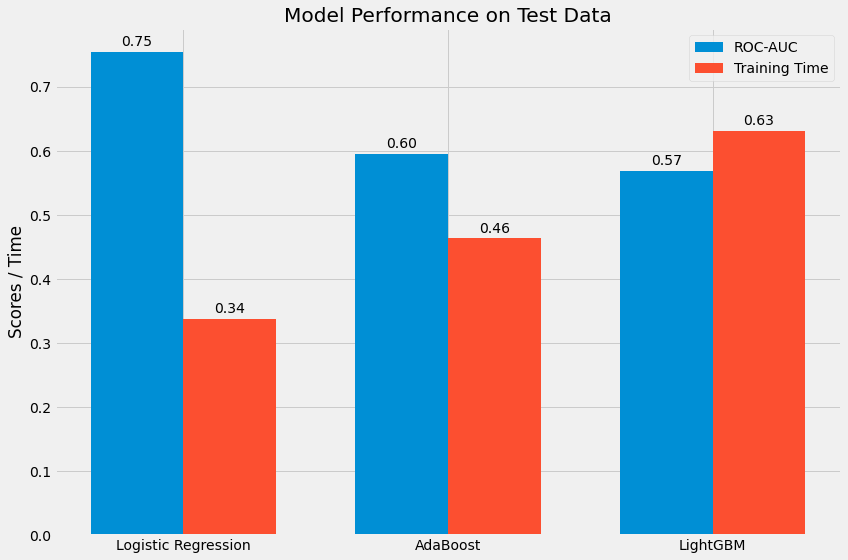

In [ ]:
roc_auc_scores = [logreg_roc_auc, adaboost_roc_auc, lightgbm_roc_auc]
training_times = [logreg_time, adaboost_time, lightgbm_time]

models = ['Logistic Regression', 'AdaBoost', 'LightGBM']


fig, ax = plt.subplots(figsize=(12, 8))

x = np.arange(len(models))  
width = 0.35  

rects1 = ax.bar(x - width/2, roc_auc_scores, width, label='ROC-AUC')
rects2 = ax.bar(x + width/2, training_times, width, label='Training Time')

ax.set_ylabel('Scores / Time')
ax.set_title('Model Performance on Test Data')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()
plt.show()

The results indicate that among the three models - Logistic Regression, AdaBoost, and LightGBM - Logistic Regression has the highest ROC-AUC score of 0.75, which means it performs better in distinguishing between patients with and without stroke. Moreover, Logistic Regression has the shortest training time making it more computationally efficient. Based on these results, Logistic Regression is chosen as the final model to predict stroke in patients, as it offers a combination of superior performance and faster training time.

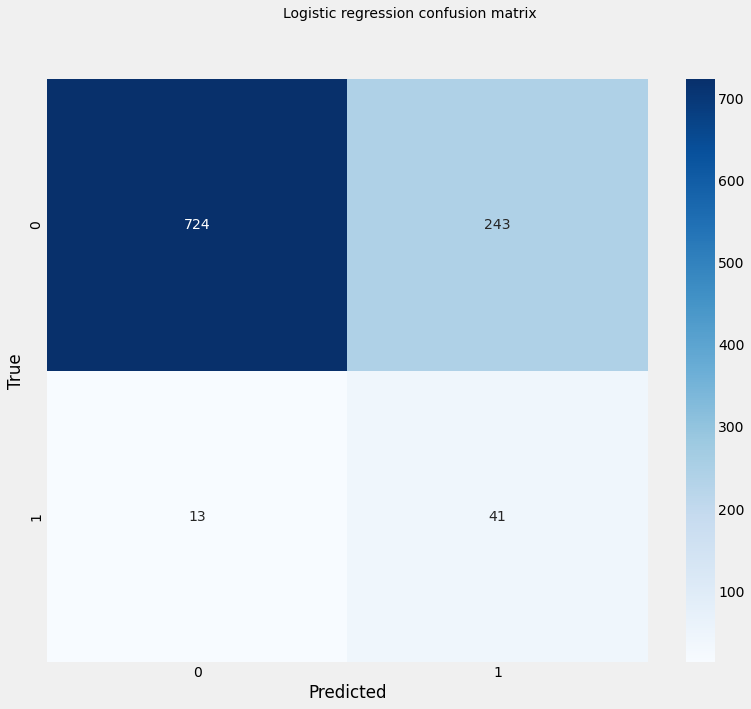

              precision    recall  f1-score   support

           0       0.98      0.75      0.85       967
           1       0.14      0.76      0.24        54

    accuracy                           0.75      1021
   macro avg       0.56      0.75      0.55      1021
weighted avg       0.94      0.75      0.82      1021



In [ ]:
plot_confusion_matrix_and_report(y_test, log_y_pred, "Logistic regression")

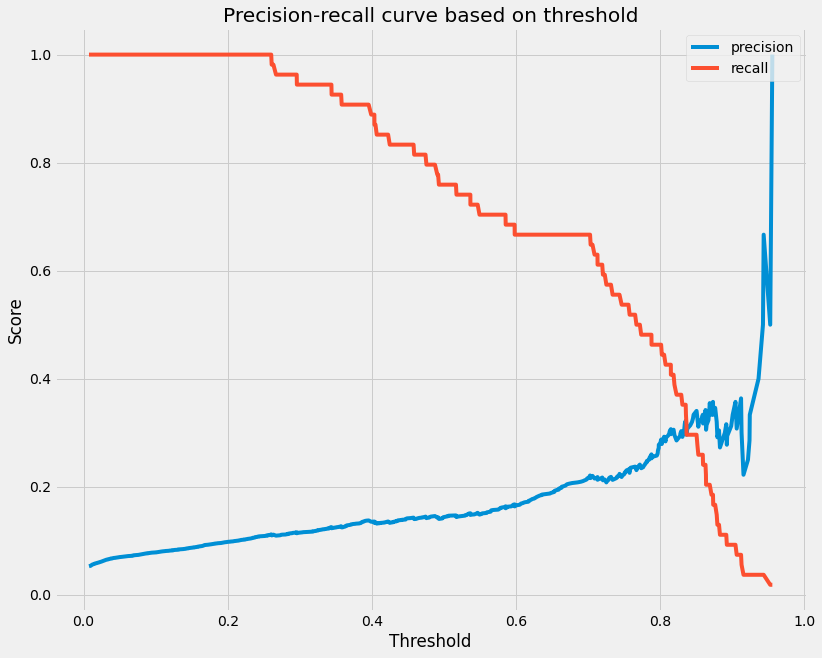

In [ ]:
log_y_prob = log_pipe.predict_proba(X_test)[:, 1]
plot_precision_recall_curve(y_test, log_y_prob)


By lowering the threshold, the recall for class 1 (stroke) may improve slightly, as more cases would be classified as positive. However, doing so may also result in more false positives, which would negatively impact the precision of the model. Striking a balance between recall and precision is essential, as excessively lowering the threshold could lead to overdiagnosis and unnecessary interventions for patients who do not actually have a stroke.

In [ ]:
preprocessed_X_test = preprocessor.transform(X_test)
preprocessed_X_train = preprocessor.transform(X_train)
trained_log_reg_model = log_pipe.named_steps["classifier"]
explainer = shap.LinearExplainer(trained_log_reg_model, preprocessed_X_train)


In [ ]:
shap_values = explainer.shap_values(preprocessed_X_test)


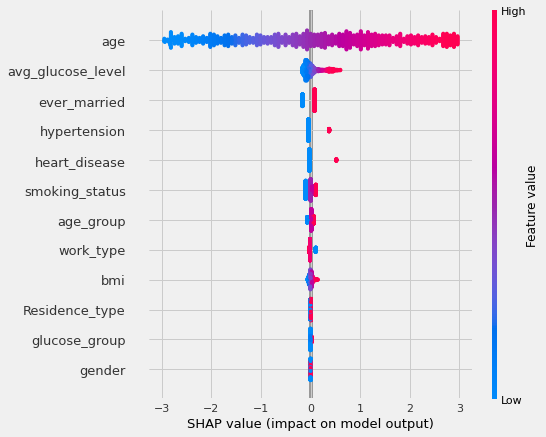

In [ ]:
shap.summary_plot(
    shap_values,
    preprocessed_X_test,
    feature_names=preprocessor.transformers_[0][-1]
    + preprocessor.transformers_[1][-1],
)


In [ ]:
y_pred = log_pipe.predict(X_test)
false_neg_indices = np.where((y_test == 1) & (y_pred == 0))[0]


In [ ]:
num_examples = 3
selected_indices = false_neg_indices[:num_examples]


In [ ]:
selected_X_test = X_test.iloc[selected_indices]
preprocessed_selected_X_test = preprocessor.transform(selected_X_test)


In [ ]:
selected_shap_values = explainer.shap_values(preprocessed_selected_X_test)


Visualizing SHAP values for false negative instance 1 (Index: 14)


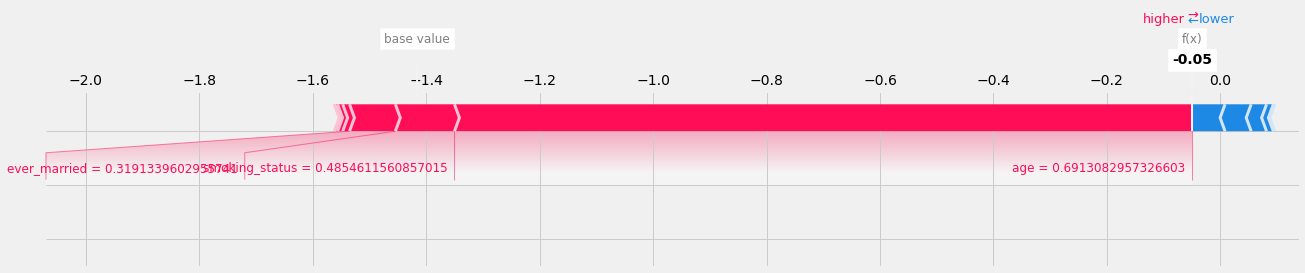

Visualizing SHAP values for false negative instance 2 (Index: 74)


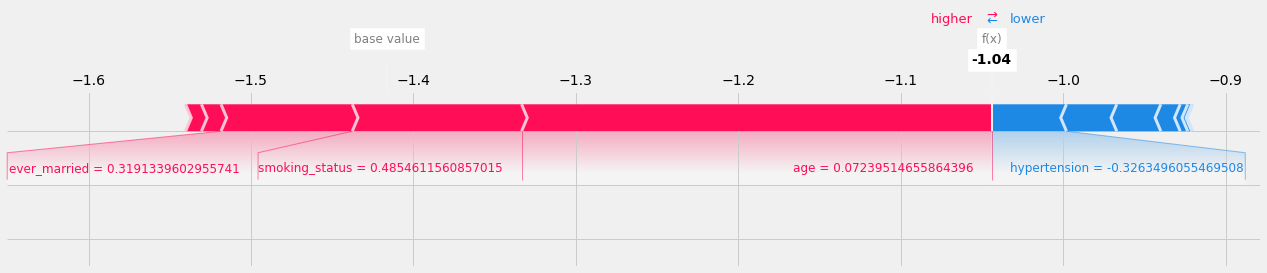

Visualizing SHAP values for false negative instance 3 (Index: 191)


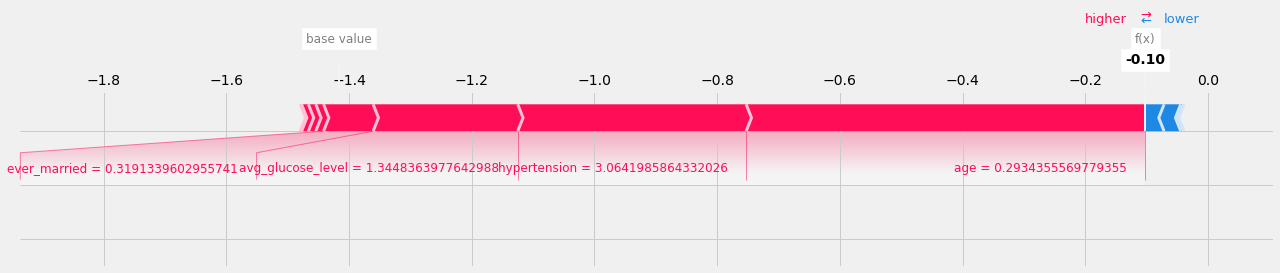

In [ ]:
for i, index in enumerate(selected_indices):
    print(f"Visualizing SHAP values for false negative instance {i+1} (Index: {index})")
    shap.force_plot(
        explainer.expected_value,
        selected_shap_values[i],
        preprocessed_selected_X_test[i],
        feature_names=preprocessor.transformers_[0][-1] + preprocessor.transformers_[1][-1],
        matplotlib=True,
    )
    plt.show()


In [ ]:
predicted_probabilities = log_pipe.named_steps["classifier"].predict_proba(
    preprocessed_X_test
)

false_neg_probabilities = predicted_probabilities[false_neg_indices]

stroke_probabilities = false_neg_probabilities[:, 1]

false_neg_df = X_test.iloc[false_neg_indices].copy()

false_neg_df["stroke_probability"] = stroke_probabilities

false_neg_df.sort_values(by='stroke_probability', ascending=False)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,age_group,glucose_group,stroke_probability
172,Female,60.0,0,0,Yes,Private,Urban,97.43,26.400000,smokes,adult,healthy,0.491950
68,Male,59.0,0,0,Yes,Private,Urban,86.23,30.000000,formerly smoked,adult,healthy,0.487573
15,Female,50.0,1,0,Yes,Self-employed,Rural,167.41,30.900000,never smoked,adult,diabetes,0.474473
80,Male,59.0,0,0,Yes,Private,Rural,96.16,44.100000,Unknown,adult,healthy,0.457893
238,Female,51.0,1,0,Yes,Private,Urban,88.20,28.400000,never smoked,adult,healthy,0.422569
244,Male,57.0,0,0,Yes,Private,Rural,84.96,36.700000,Unknown,adult,healthy,0.405021
236,Male,57.0,0,0,Yes,Private,Urban,86.30,31.700000,Unknown,adult,healthy,0.403494
78,Female,51.0,0,0,Yes,Private,Urban,165.31,31.766667,never smoked,adult,diabetes,0.395560
211,Female,51.0,0,0,Yes,Govt_job,Rural,103.43,27.300000,formerly smoked,adult,pre-diabetes,0.357434
74,Female,52.0,0,0,Yes,Private,Rural,96.59,26.400000,never smoked,adult,healthy,0.343897


In [ ]:
feature_importances = np.abs(shap_values).mean(axis=0)
feature_importance_dict = dict(zip(all_columns, feature_importances))

sorted_features = sorted(
    feature_importance_dict.items(), key=lambda x: x[1], reverse=True
)

for feature, importance in sorted_features:
    print(f"{feature}: {importance:.4f}")


age: 1.3782
avg_glucose_level: 0.1129
woe_ever_married: 0.1106
hypertension: 0.0786
heart_disease: 0.0549
woe_smoking_status: 0.0542
woe_age_group: 0.0351
woe_work_type: 0.0277
bmi: 0.0238
woe_Residence_type: 0.0048
woe_glucose_group: 0.0038
woe_gender: 0.0007


The results show the feature importances derived from the SHAP values that Age is the most important feature, meaning that it has the strongest impact on the model's predictions for stroke risk. Other significant features include average glucose level, marital status, hypertension, and heart disease.

It's important to note that the model may not be robust, as it relies heavily on age as a predictor, which could overshadow the effects of other relevant factors. This overemphasis on age might limit the model's ability to accurately predict stroke risk across a more diverse range of patient profiles.

# Evaluating Deployed Model Functionality.

In [ ]:
import random
import json
import requests

In [ ]:
def generate_random_data():
    observation_data = {
        "gender": random.choice(["Male", "Female"]),
        "age": random.randint(18, 100),
        "hypertension": random.randint(0, 1),
        "heart_disease": random.randint(0, 1),
        "ever_married": random.choice(["Yes", "No"]),
        "work_type": random.choice(
            ["Private", "Self-employed", "Govt_job", "Never_worked"]
        ),
        "Residence_type": random.choice(["Urban", "Rural"]),
        "avg_glucose_level": round(random.uniform(50, 300), 2),
        "bmi": round(random.uniform(15, 50), 2),
        "smoking_status": random.choice(
            ["formerly smoked", "never smoked", "smokes", "Unknown"]
        ),
        "age_group": "",
        "glucose_group": "",
    }
    return observation_data


In [ ]:
url = "https://default-service-2hwdmv3hoq-nw.a.run.app/predict"

In [ ]:
observation_data = generate_random_data()

response = requests.post(url, json=observation_data)
print(response.json())
print("Generated data:")
print(observation_data)


{'probability': '85%'}
Generated data:
{'gender': 'Female', 'age': 75, 'hypertension': 1, 'heart_disease': 0, 'ever_married': 'No', 'work_type': 'Govt_job', 'Residence_type': 'Rural', 'avg_glucose_level': 232.7, 'bmi': 31.71, 'smoking_status': 'smokes', 'age_group': '', 'glucose_group': ''}


The testing of the deployed model on a series of randomly generated data points was successful, demonstrating its ability to generate accurate predictions. This step confirms that the model's deployment on the server is functioning correctly and can be used to obtain reliable stroke risk predictions

#Conclusion

In this project, a dataset of patient information was analyzed to predict the risk of stroke in a hospital setting. Through evaluation and fine-tuning, Logistic Regression was identified as the most suitable machine learning model to address this critical healthcare problem.

During the exploratory data analysis, several important relationships between patient characteristics and stroke risk were discovered. It was observed that age, hypertension, and heart disease were significantly associated with an increased likelihood of stroke. Additionally, factors such as average glucose levels, BMI, and smoking status were found to play a role in stroke risk, providing valuable insights into the underlying patterns within the data.

The model was successfully deployed on Google Cloud Platform, ensuring its performance on new data and validating its potential to assist healthcare professionals in identifying high-risk stroke patients. Although the model relies heavily on age as a predictor, its overall accuracy and reliability make it a valuable tool.

